# Cat vs Dog Image Classification

## Importing all necessary libraries and defining constants that will apply to our images.

In [104]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

img_width = 128
img_height = 128
img_size = (128, 128)
img_channels = 3

## Next, we will prepare the training data

In [105]:
Directory = os.listdir("./train/train")

labels = []
for name in Directory:
    label = name.split('.')[0]
    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)

df = pd.DataFrame({
    'filename':Directory,
    'label':labels
})

### Visualizing the data frame:

In [106]:
df.head()

,filename,label
0,dog.8011.jpg,1
1,cat.5077.jpg,0
2,dog.7322.jpg,1
3,cat.2718.jpg,0
4,cat.10151.jpg,0


## Now we will create the model

This model will contain an input layer, convolutional layer, pooling layer, fully connect layer, and an output layer.

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = (128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
    optimizer = 'rmsprop', metrics = ['accuracy'])

/Users/tyjenkins/Documents/ML Projects/Cat vs. Dog/.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Summary of the model:

In [108]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_31 (Conv2D)              │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 126, 126, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,962,242 (49.45 MB)

 Trainable params: 12,960,706 (49.44 MB)

 Non-trainable params: 1,536 (6.00 KB)

We will implement some callbacks now to prevent overfitting by stopping our function after 10 epochs and no decres in the loss value. We will also be reducing the learning rate whwn accuracy has not increased for 2 steps.

In [109]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',
                                            patience = 2,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.00001,
                                            mode = 'max')
callbacks = [earlystop, learning_rate_reduction]

## Preparing the data
Since we are using a categorical classifier, we need to specificy strings for each category. In this case we will be labeling a dog as 1 and a cat as 0.

In [110]:
df["label"] = df["label"].replace({0: 'cat', 1: 'dog'})
train_data, validation_data = train_test_split(df, test_size = 0.20, random_state = 42)
train_data = train_data.reset_index(drop = True)
validation_data = validation_data.reset_index(drop = True)

final_train_data = train_data.shape[0]
final_validation_data = validation_data.shape[0]
batch_size = 15

## Creating the training generator:

In [111]:
generate_train_data = ImageDataGenerator(rotation_range = 15,
                                        rescale = 1./255,
                                        shear_range = 0.1,
                                        zoom_range = 0.2,
                                        horizontal_flip = True,
                                        width_shift_range = 0.1,
                                        height_shift_range = 0.1
                                        )

train_gen = generate_train_data.flow_from_dataframe(train_data,
                                                    "./train/train/",
                                                     x_col = 'filename',
                                                    y_col = 'label',
                                                    target_size = img_size,
                                                    class_mode = 'categorical',
                                                    batch_size = batch_size,
                                                    shuffle = True,
                                                    seed = 42
                                                    )

Found 20000 validated image filenames belonging to 2 classes.


## Creating the validation data generator
We will also be generatoring validation data to check the model with so that we can ensure it is heading in the correct direction

In [112]:
generate_validation_data = ImageDataGenerator(rescale = 1./255)
validation_gen = generate_validation_data.flow_from_dataframe(validation_data,
                                                            "./train/train/",
                                                            x_col = 'filename',
                                                            y_col = 'label',
                                                            target_size = img_size,
                                                            class_mode = 'categorical',
                                                            batch_size = batch_size
                                                            )

Found 5000 validated image filenames belonging to 2 classes.


## Training the model

In [113]:
epochs = 10
history = model.fit(
    train_gen,
    epochs = epochs,
    validation_data = validation_gen,
    validation_steps = final_validation_data // batch_size,
    callbacks = callbacks
)

/Users/tyjenkins/Documents/ML Projects/Cat vs. Dog/.venv/lib/python3.13/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 279s 209ms/step - accuracy: 0.6137 - loss: 0.7783 - val_accuracy: 0.6450 - val_loss: 0.6579 - learning_rate: 0.0010
Epoch 2/10


/Users/tyjenkins/Documents/ML Projects/Cat vs. Dog/.venv/lib/python3.13/site-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


1334/1334 ━━━━━━━━━━━━━━━━━━━━ 285s 213ms/step - accuracy: 0.7038 - loss: 0.5796 - val_accuracy: 0.7399 - val_loss: 0.5734 - learning_rate: 0.0010
Epoch 3/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 289s 216ms/step - accuracy: 0.7396 - loss: 0.5339 - val_accuracy: 0.7475 - val_loss: 0.5283 - learning_rate: 0.0010
Epoch 4/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 292s 219ms/step - accuracy: 0.7661 - loss: 0.4896 - val_accuracy: 0.7383 - val_loss: 0.6427 - learning_rate: 0.0010
Epoch 5/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 296s 222ms/step - accuracy: 0.7881 - loss: 0.4594 - val_accuracy: 0.8266 - val_loss: 0.3883 - learning_rate: 0.0010
Epoch 6/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 297s 222ms/step - accuracy: 0.7995 - loss: 0.4358 - val_accuracy: 0.8468 - val_loss: 0.3558 - learning_rate: 0.0010
Epoch 7/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 299s 224ms/step - accuracy: 0.8156 - loss: 0.4076 - val_accuracy: 0.8707 - val_loss: 0.3150 - learning_rate: 0.0010
Epoch 8/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 293s 220ms/step - acc

In [115]:
model.save("model1_catsVSdogs_10epoch.keras")

## Now, we will prepare the test dataset similarly to the way we did with the training data

In [118]:
test_filenames = os.listdir("./test/test1")
test_data = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_data.shape[0]

## Generating the test data:

In [119]:
generate_test_data = ImageDataGenerator(rescale = 1./255)
test_gen = generate_test_data.flow_from_dataframe(
    test_data,
    "./test/test1/",
    x_col = 'filename',
    y_col = None,
    class_mode = None,
    target_size = img_size,
    batch_size = batch_size,
    shuffle = False
)

Found 12500 validated image filenames.


## Time to perform the predictions

In [123]:
prediction = model.predict(test_gen, steps = int(np.ceil(nb_samples / batch_size)))

834/834 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step


We need to convert the predicted category back into one of our generator classes. This is either 1 for dog or 0 for cat.

In [124]:
test_data['label'] = np.argmax(prediction, axis = -1)

label_map = dict((v, k) for k, v in train_gen.class_indices.items())
test_data['label'] = test_data['label'].replace(label_map)

test_data['label'] = test_data['label'].replace({ 'dog': 1, 'cat': 0 })

/var/folders/yv/qq34xmq15393zfty3h644j380000gn/T/ipykernel_9129/1762428533.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['label'] = test_data['label'].replace({ 'dog': 1, 'cat': 0 })


## Visualizing the prediction

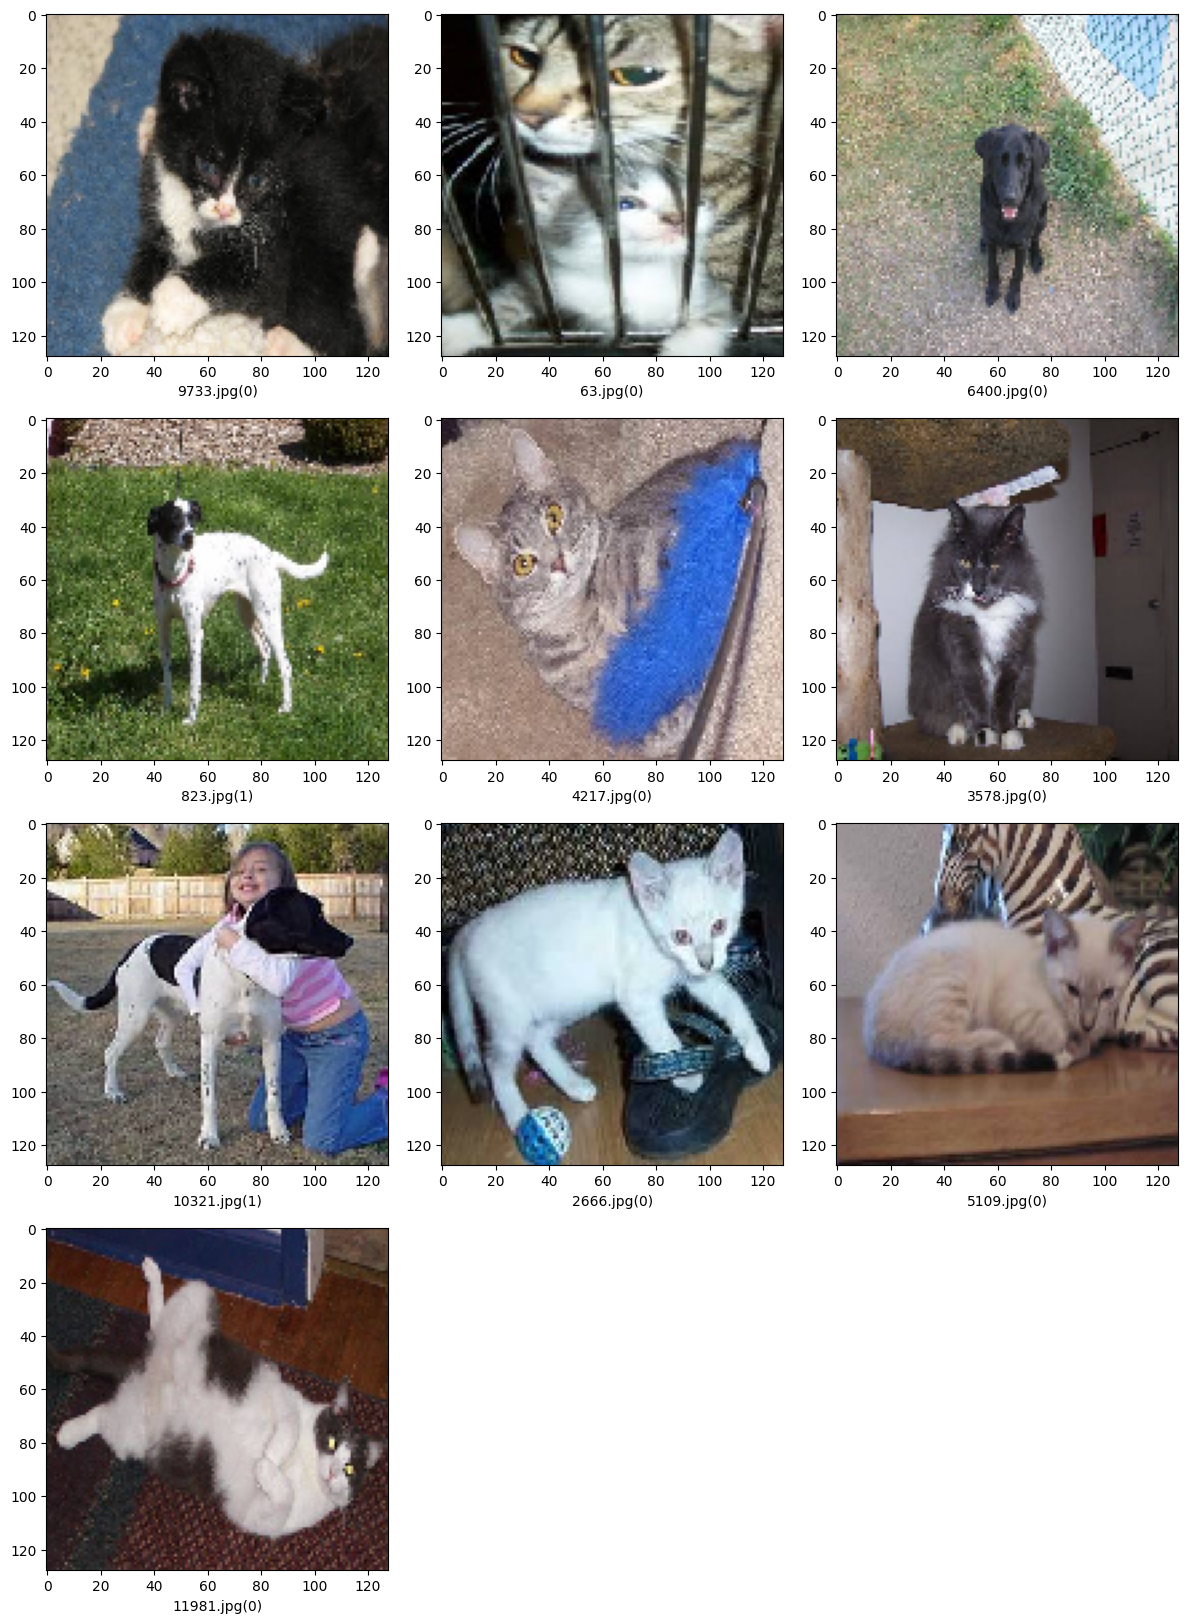

In [126]:
testing = test_data.head(10)
testing.head()
plt.figure(figsize = (12, 24))
for index, row in testing.iterrows():
    filename = row['filename']
    label = row['label']
    image = load_img("./test/test1/" + filename, target_size = img_size)
    plt.subplot(6, 3, index + 1)
    plt.imshow(image)
    plt.xlabel(filename + '(' + "{}".format(label) + ')' )
plt.tight_layout()
plt.show()

## Time to test the model on custom data

In [129]:
results = {
    0: 'cat',
    1: 'dog'
}
from PIL import Image
import numpy as np
im = Image.open("download1.jpg")
im = im.resize(img_size)
im = np.expand_dims(im, axis = 0)
im = np.array(im)
im = im / 255
pred = np.argmax(model.predict([im]), axis = 1)[0]
print(pred, results[pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
0 cat


/Users/tyjenkins/Documents/ML Projects/Cat vs. Dog/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_1563
Received: inputs=('Tensor(shape=(1, 128, 128, 3))',)
  warnings.warn(msg)
